In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

df = pd.read_csv("temporal/autos.csv", sep = ";", encoding  = "utf-8")
X = df.drop('Precio', axis=1)
y = df['Precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fijando los hiperparametros del mejor mod
param_grid = {
     'n_estimators': [750], 
     'max_depth':[7],
     'learning_rate':[0.01],
     'min_child_weight':[2],
     'booster':['gbtree'],
     'eta': [1],
     'gamma': [1],
     'lambda': [1],
     'alpha': [0.66],
     'subsample': [0.8],
     'colsample_bytree': [0.78],
     'objective': ['reg:squarederror']
}
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_features, train_labels)
best_grid = grid_search.best_estimator_
print(best_grid)

In [ ]:
# Hacer predicciones utilizando el modelo
predicciones = best_grid.predict(X_test)

# Calcular el RMSE
rmse = mean_squared_error(X_test, predicciones, squared=False)
# Calcular el R 2
r_cuadrado = r2_score(X_test, predicciones)
n = len(X_test)
p = test_features.shape[1]  # Número de columnas en X_test
# Calcular R cuadrado manualmente
r_cuadrado_ajustado = 1 - ((1 - r_cuadrado) * (n - 1) / (n - p - 1))

print(r_cuadrado, r_cuadrado_ajustado,  rmse)


0.8724660053523096 0.8675920947288309 16682572.632757127


In [ ]:
# Hacer predicciones utilizando el modelo
predicciones = best_grid.predict(train_features)

# Calcular el RMSE
rmse = mean_squared_error(train_labels, predicciones, squared=False)

# Calcular el R 2
r_cuadrado = r2_score(train_labels, predicciones)

n = len(train_labels)
p = train_features.shape[1]  # Número de columnas en test_features
# Calcular R cuadrado manualmente
r_cuadrado_ajustado = 1 - ((1 - r_cuadrado) * (n - 1) / (n - p - 1))

print(r_cuadrado, r_cuadrado_ajustado,  rmse)


0.9692984256437813 0.9690135656755278 8418427.821285782


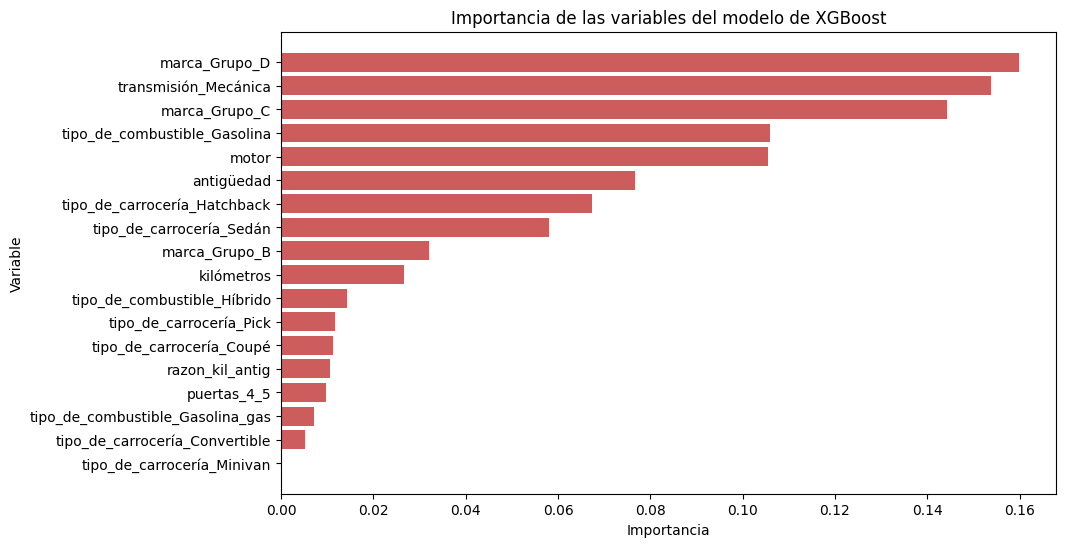

In [ ]:
import matplotlib.pyplot as plt

# Obtener la importancia de las variables
importancias_variables = best_grid.feature_importances_

# Obtener nombres de las variables
nombres_variables = train_features.columns

# Crear un DataFrame para visualizar la importancia de las variables
df_importancias = pd.DataFrame({'Variable': nombres_variables, 'Importancia': importancias_variables})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=True)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'], color = "#CD5C5C")
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables del modelo de XGBoost')
plt.show()


In [ ]:
# MLG
import pandas as pd
import statsmodels.api as sm

y_train = train["precio"]
x_train = train
del x_train["precio"]


# Ajustar el modelo lineal generalizado con enlace logarítmico
model = sm.GLM(y_train, x_train, family=sm.families.Gamma(link=sm.families.links.log))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())


TypeError: Calling Family(..) with a link class is not allowed. Use an instance of a link class instead.